In [33]:
#Інсталювання пакету clustergram
!pip install clustergram

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import (StandardScaler, LabelEncoder,
                                   OneHotEncoder, PolynomialFeatures,
                                   scale)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              HistGradientBoostingClassifier, VotingClassifier,
                              StackingClassifier, AdaBoostClassifier,
                              BaggingClassifier)
import xgboost as xgb
from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay,
                             silhouette_score)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

from clustergram import Clustergram
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


path = "/content/drive/MyDrive/ML_Hillel/HW_L10_DimReduction/south+german+credit+update/"

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Зчитуємо датасет South German Credit:
df = pd.read_csv(path + 'SouthGermanCredit.asc', delimiter=' ', header = 0)
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


Маємо датасет з 21 колонкою (колонка kredit - таргет, визначає добрі і погані кредити), 1000 об'єктів, числові типи, без пропусків

#1. Стандартизація

In [38]:
# Спершу стандартизуємо дані (оскільки алгоритми кластерзації  PCA чутливі до масштабу):
data = pd.DataFrame(scale(df.drop(columns=['kredit'])))
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.254566,-0.240857,1.344014,-0.301852,-0.787657,-0.699707,-1.145978,0.918477,-0.963650,-0.303686,1.046987,-0.341055,-1.281573,0.460831,-1.751205,-0.704926,0.146949,0.428290,-0.823318,0.196014
1,-1.254566,-0.987573,1.344014,-1.030963,-0.167384,-0.699707,-0.317959,-0.870183,0.449326,-0.303686,-0.765977,-1.293723,0.040363,0.460831,-1.751205,1.027079,0.146949,-2.334869,-0.823318,0.196014
2,-0.459026,-0.738668,-0.503428,2.250036,-0.861381,-0.066488,0.510060,-0.870183,-0.963650,-0.303686,1.046987,-1.293723,-1.105315,0.460831,-1.751205,-0.704926,-1.383771,0.428290,-0.823318,0.196014
3,-1.254566,-0.738668,1.344014,-1.030963,-0.407341,-0.699707,-0.317959,0.024147,0.449326,-0.303686,-0.765977,-1.293723,0.304750,0.460831,-1.751205,1.027079,-1.383771,-2.334869,-0.823318,-5.101669
4,-1.254566,-0.738668,1.344014,-1.030963,-0.389974,-0.699707,-0.317959,0.918477,0.449326,-0.303686,1.046987,-0.341055,0.216621,-2.375050,0.135869,1.027079,-1.383771,0.428290,-0.823318,-5.101669


In [39]:
''' Тестувався інший метод масштабування, тому цю комірку не застосовуємо
# Спершу стандартизуємо дані (оскільки PCA чутливий до масштабу):

#Назви ознак
df_columns_scaled = list(df.columns)
df_columns_scaled.remove('kredit')

#Масштабування згідно StandardScaler
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df.drop(columns='kredit')), columns = df_columns_scaled)

X = df_scaled.copy()
y = df['kredit']


# Об'єднуємо з таргетом
df_scaled = pd.concat([X, y], axis = 1)

df_scaled
'''

" Тестувався інший метод масштабування, тому цю комірку не застосовуємо\n# Спершу стандартизуємо дані (оскільки PCA чутливий до масштабу):\n\n#Назви ознак\ndf_columns_scaled = list(df.columns)\ndf_columns_scaled.remove('kredit')\n\n#Масштабування згідно StandardScaler\nsc = StandardScaler()\ndf_scaled = pd.DataFrame(sc.fit_transform(df.drop(columns='kredit')), columns = df_columns_scaled)\n\nX = df_scaled.copy()\ny = df['kredit']\n\n\n# Об'єднуємо з таргетом\ndf_scaled = pd.concat([X, y], axis = 1)\n\ndf_scaled\n"

#2.Кластерний аналіз. Вибір оптимальної кластеризації

##2.1 Кластерграма

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.007 seconds.
K=3 fitted in 0.016 seconds.
K=4 fitted in 0.012 seconds.
K=5 fitted in 0.013 seconds.
K=6 fitted in 0.015 seconds.
K=7 fitted in 0.028 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='Mean of the clusters'>

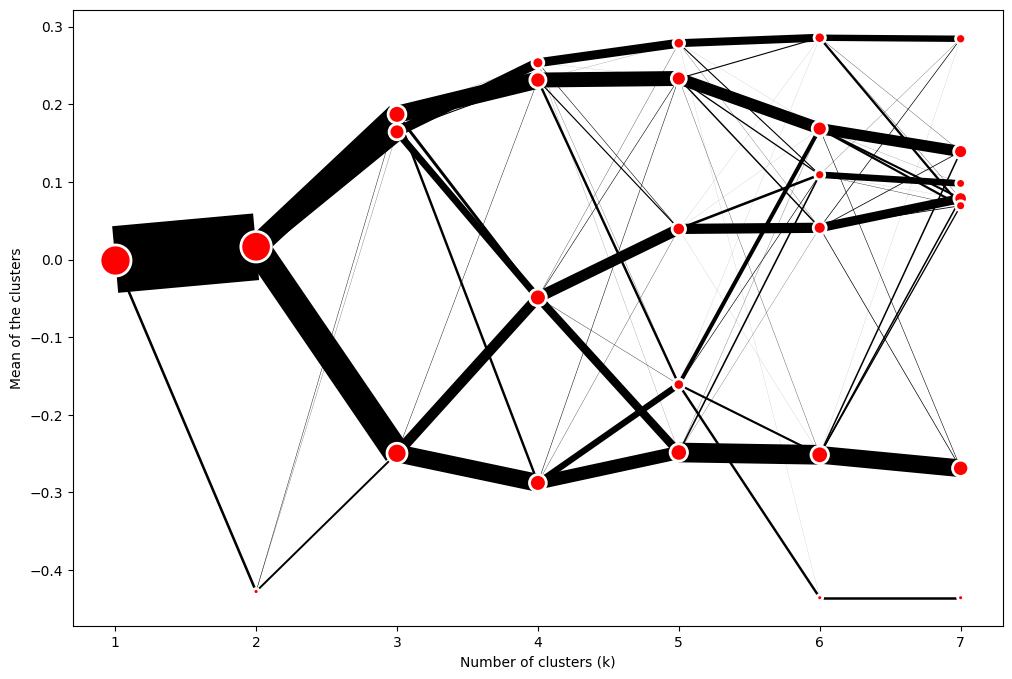

In [40]:
# Будуємо кластерграму
cgram = Clustergram(range(1, 8), random_state=17)
cgram.fit(data)
cgram.plot(figsize=(12, 8), pca_weighted=False)

З графіка бачимо:

*   нерівномірний розподіл при k=2 (один кластер дуже маленький у порівнянні)
*   при k=4 вже починають об'єднуватись кластери, які роз'єднались на етапі 2
*   при k=3 два кластери дуже близько один до одного

Отже, якогось ідеального розбиття не зауважено, варіантів може бути 2:
розглянути групу 2 при k=2, можливо, їх не враховувати в дослідженні, або ж
розглянути кластери при k=3 / 4. Розглянемо другий варіант








##2.2 KMeans

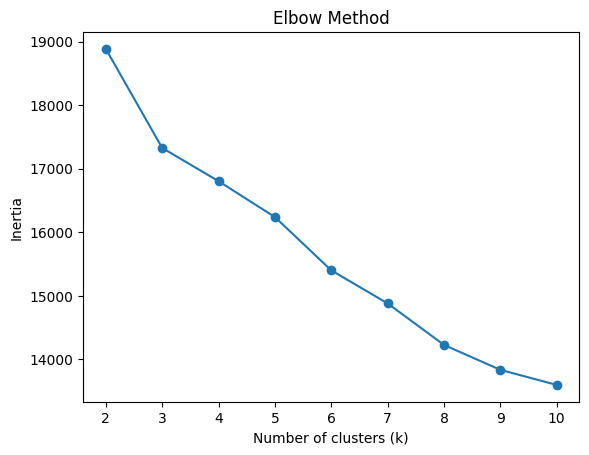

In [41]:
#Застосуємо кластеризацію kMeans і підберемо параметри k через інерційність
# (атрибут kmeans.inertia_ ) , який характеризує розкиданість (компактність) точок у межах кластерів
# Тут критерієм є метод ліктя, оскільки при збільшенні k inertia_ теж спадатиме, тому
# шукаємо точки перегину графіку

inertias = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=17).fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Графік майже лінійно спадає, єдиною точкою, підходящою для "ліктя", є точка k=3,
яку теж виявлено при аналізі кластерграми

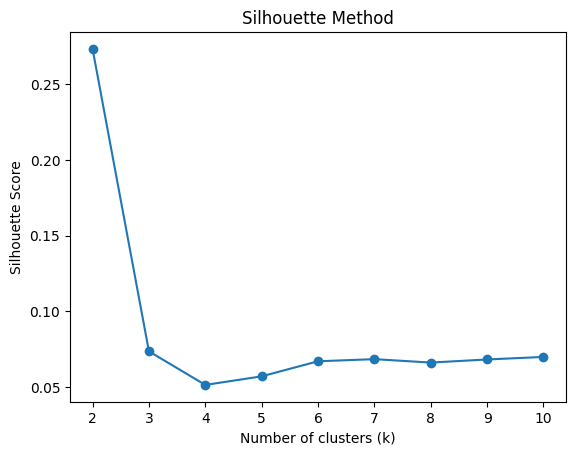

In [42]:
# Подивимось ще підбір за допомогою методу силуетних коефіцієнтів (Silhouette Score). який
# характеризує наскільки добре точки належать до своїх кластерів і наскільки віддалені від інших кластерів
# Тут дивимось за max

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=17).fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

Бачимо, що за цим методом найкраще розбиття за k=2, але другою по значенню точкою є k=3. Також можна зауважити, що при k=4 силуетний коефіцієнт взагалі найнижчий.

Отже, три підходи показали, що при застосуванні kMeans якогось явного оптимального розбиття датасету немає, при кожному k є певні недоліки. Але за даних умов для kMeans вважаю найкращим розбиттям k=3 , в якому є "лікоть" (по інерційності) і точка є другою кращою по коефіцієнту силуета.

In [43]:
# Застосуємо KMeans при k=3 і подивимось які точки знаходяться у кластерах
kmeans_k3 = KMeans(n_clusters=3, random_state=17).fit(data)

#Щоб побачити, які саме точки об'єднані в кластери:
for i in range(len(np.unique(kmeans_k3.labels_))):
    print(f"Точки у кластері {i}: {np.where(kmeans_k3.labels_ == i)[0]}")

Точки у кластері 0: [  0   1   2   3   4   5   6   7   9  10  12  14  15  16  17  20  21  22
  23  24  26  28  33  34  38  45  46  48  50  52  57  64  65  68  75  85
  90  93  96  98 101 105 107 110 111 113 115 117 122 126 127 128 130 132
 133 135 137 143 150 151 154 156 162 164 171 172 173 177 180 181 193 194
 198 204 206 207 210 211 212 214 215 216 217 219 224 226 227 231 234 237
 238 242 245 248 249 255 256 257 258 260 262 263 264 266 268 270 272 275
 278 280 281 282 284 285 287 291 296 297 298 299 300 302 304 305 306 307
 308 313 314 317 319 320 321 323 324 326 328 333 335 338 339 341 343 345
 348 350 353 358 361 363 365 367 368 369 373 376 378 380 381 383 385 386
 387 388 389 390 394 395 397 398 399 401 402 403 406 407 408 410 420 428
 429 437 443 445 447 449 450 454 457 458 459 462 463 464 466 468 473 475
 477 481 488 490 496 498 499 500 509 510 511 513 514 515 522 523 526 527
 532 534 536 540 542 543 545 546 548 550 552 554 557 559 565 570 577 580
 581 583 587 588 589 590 593 59

Кластери більш-менш однакового розміру (немає явної незбалансованості), що підтверджує ілюстровану інф. з графіку кластерграми

##2.3 Агломеративний метод

Намалюємо дендрограму для агломеративного методу датасету

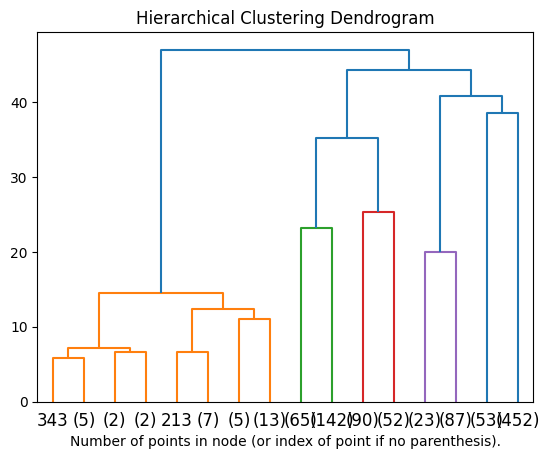

In [44]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Дендрограма вказує на незбалансованість кластерів: бачимо, що у лівому кластері (помаранчевий) дуже мало точок, хоча з моменту утворення 9 кластерів він фігурує як окремий і не з'єднується ні з яким іншим кластером. У лівому кластері лише 33 точки, для порівняння, вже на стадії 9 кластерів, у крайньому правому кластері 452 точки.

Для кращої ілюстрації побудуємо кластерграму, використовуючи агломеративний метод

<Axes: xlabel='Number of clusters (k)', ylabel='Mean of the clusters'>

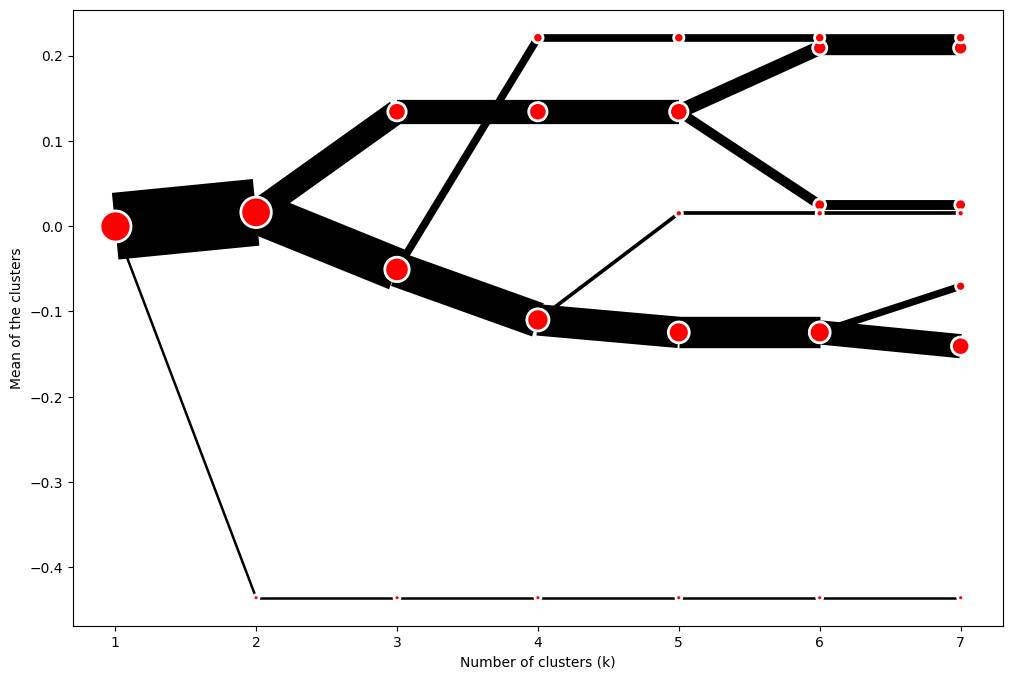

In [45]:
# Кластерграма з використанням агломеративного методу (linkage='ward', оскільки за цим параметром будувалась модель вище)
cgram = Clustergram(range(1, 8), method='hierarchical', linkage='ward')
cgram.fit(data)
cgram.plot(figsize=(12, 8), pca_weighted=False)

Спостерігаємо таку ж ситуацію: окремий невеликий кластер; лінії не перетинаються, що характерно для ієрархічних методів; при k=6 у моделі відразу 2 випадки дуже близьких кластерів, що не дуже добре.

Тому оптимальну кількість кластерів можна вважати серед k={3,4,5}


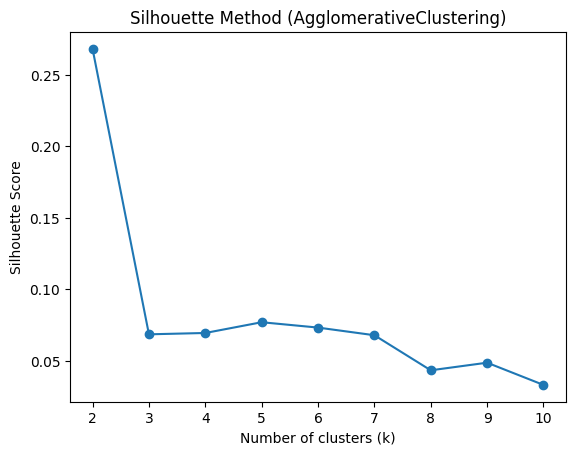

In [46]:
silhouette_scores = []
for k in range(2, 11):
    model_aglomer = AgglomerativeClustering(distance_threshold=None, n_clusters=k)
    labels = model_aglomer.fit_predict(data) #оскільки для агломерації немає методу labels, то тут використаємо fit_predict
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method (AgglomerativeClustering)')
plt.show()


Варіант k=2 згідно графіків не є оптимальним (дуже нерівномірні кластери), велике значення silhouette_scores може бути пов'язане із структурою даних та самим принципом обчислення цього коефіцієнта.

Тому найкращим для агломеративного методу можна вважати розбиття на 5 кластерів.

Кластеризуємо датасет агломеративним методом на 5 кластерів:

In [47]:
# set n_clusters=5
model_aglomer = AgglomerativeClustering(distance_threshold=None, n_clusters=5)
labels_aglomer = model_aglomer.fit_predict(data)

#Відобразимо, які саме точки об'єднані в кластери:
for i in range(len(np.unique(labels_aglomer))):
    print(f"Точки у кластері {i}: {np.where(labels_aglomer == i)[0]}")

Точки у кластері 0: [  1   8  10  15  16  18  19  20  21  24  25  27  29  30  31  36  40  43
  44  53  54  55  56  58  59  60  62  63  64  66  69  70  71  72  73  77
  78  81  84  85  86  87  88  89  93  95 100 109 114 118 121 124 125 129
 134 136 138 139 140 141 142 143 144 145 146 147 149 150 165 173 174 177
 186 187 188 196 206 220 221 222 226 231 235 236 237 238 239 244 245 247
 250 251 252 258 259 261 263 264 265 266 267 269 270 273 275 279 286 287
 288 290 292 293 303 310 311 314 315 316 325 329 330 334 337 338 340 344
 346 347 348 351 353 354 356 359 360 364 365 366 374 384 387 391 392 393
 400 405 410 411 412 413 414 416 418 419 421 422 423 424 425 431 434 435
 438 439 444 445 446 449 450 451 454 460 461 465 467 469 470 472 476 478
 479 480 482 489 491 494 497 501 502 506 507 508 511 517 524 530 531 533
 536 537 538 541 544 547 550 551 560 563 566 567 568 571 573 576 577 579
 582 584 586 591 597 600 602 604 607 608 609 616 617 619 622 624 625 627
 628 629 630 634 636 639 640 64

#3. Зменшення розмірності простору (PCA)

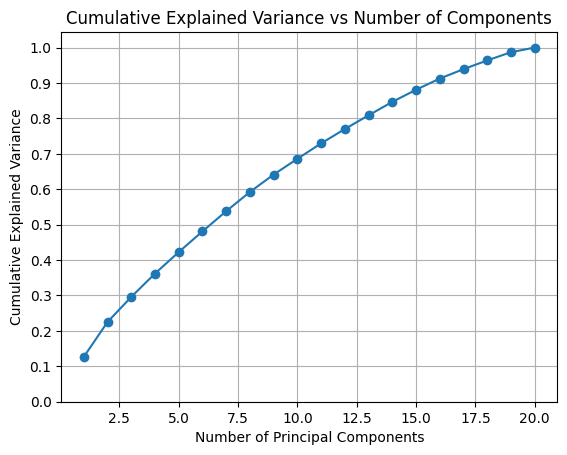

In [48]:
# Виконуємо PCA без зазначення кількості компонент:
pca = PCA(random_state=17).fit(data)

# Обчислення накопиченої дисперсії:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Побудова графіку:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker = 'o')
#plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.show()

Як бачимо з графіка, якщо хочемо зберегти 70% інформації датасету, то можемо залишити 11 головних компонент (нових ознак) за методом PCA

In [49]:
#Застосуємо метод PCA, щоб залишити 11 ознак
pca = PCA(random_state=17, n_components=11)
X_pca = pca.fit_transform(data)

# Обчислюємо сумарну частку поясненої дисперсії:
explained_variance = np.sum(pca.explained_variance_ratio_)
print('Сумарна частка поясненої дисперсії:', explained_variance)

#Частка поясненої дисперсії в розмірі головних компонент
print('Частки поясненої дисперсії в розмірі головних компонент\n', pca.explained_variance_ratio_)

#Виведемо список внесків кожної компоненти у пояснення дисперсії даних.
print('Список внесків кожної компоненти у пояснення дисперсії даних\n', pca.singular_values_)


Сумарна частка поясненої дисперсії: 0.7295964949294488
Частки поясненої дисперсії в розмірі головних компонент
 [0.12679607 0.09842891 0.07075016 0.06601061 0.06064316 0.05846197
 0.05691461 0.0544174  0.04907078 0.04447399 0.04362883]
Список внесків кожної компоненти у пояснення дисперсії даних
 [50.35793196 44.3686625  37.61652903 36.33472463 34.82618656 34.19414312
 33.738585   32.99012065 31.32755442 29.82414774 29.53940723]


#4. Аналіз по алгоритму KMeans у зменшеному просторі

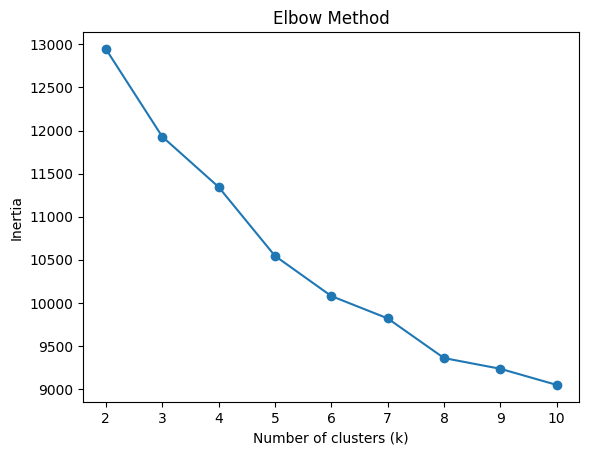

In [50]:
#Застосуємо кластеризацію kMeans для датасету у зменшеному просторі і підберемо параметри k через інерційність
# (атрибут kmeans.inertia_ ) , який характеризує розкиданість (компактність) точок у межах кластерів
# Тут критерієм є метод ліктя, оскільки при збільшенні k inertia_ теж спадатиме, тому
# шукаємо точки перегину графіку

inertias = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=17).fit(X_pca)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

"Лікоть" при k=8 тепер зовсім невидимий, натомість виділяється "лікоть" при k=8.
Перевіримо це припущення через силует

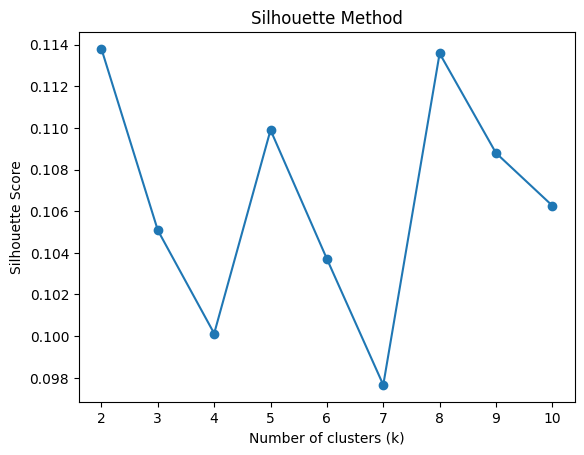

In [51]:
# Подивимось ще підбір за допомогою методу силуетних коефіцієнтів (Silhouette Score), який
# характеризує наскільки добре точки належать до своїх кластерів і наскільки віддалені від інших кластерів
# Тут дивимось за max

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=17).fit(pd.DataFrame(X_pca))
    score = silhouette_score(pd.DataFrame(X_pca), kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

Справді, через підбір коефіцієнтів за допомогою методу силуетних коефіцієнтів (Silhouette Score) бачимо максимальний показник коефіцієнту силуета при k=8.
Тож можна сказати, що відкидання 30% інформації мало вплив для використання алгоритму KMeans

Виконаємо KMeans для k=3 та порівняємо кластери

In [52]:
# Застосуємо KMeans для зменшеного простору при k=3 і подивимось які точки знаходяться у кластерах
kmeans_k3_reduced = KMeans(n_clusters=3, random_state=17).fit(X_pca)

#Щоб побачити, які саме точки об'єднані в кластери:
for i in range(len(np.unique(kmeans_k3_reduced.labels_))):
    print(f"Точки у кластері {i}: {np.where(kmeans_k3_reduced.labels_ == i)[0]}")

Точки у кластері 0: [  0   1   2   3   4   5   6   7   9  10  12  14  15  16  17  21  22  23
  26  28  33  34  38  45  46  48  50  51  52  57  64  65  67  68  75  85
  90  93  96  98 101 105 107 108 110 111 113 115 117 122 126 127 128 130
 132 133 135 137 143 150 151 154 156 162 164 171 172 173 177 180 181 184
 193 194 198 204 206 207 210 211 212 214 215 216 217 219 224 226 227 231
 234 237 238 242 244 245 248 255 256 257 258 260 262 263 264 266 268 269
 270 272 275 278 280 281 282 284 285 287 291 296 297 298 299 300 302 304
 305 306 307 308 313 314 317 319 320 321 322 323 324 326 328 333 335 338
 339 341 343 345 348 353 358 361 363 365 366 367 368 369 373 376 378 380
 381 383 385 386 387 388 389 390 394 395 397 398 399 400 401 402 403 406
 407 408 410 420 428 429 432 437 443 445 447 449 450 454 457 458 459 462
 463 464 466 468 473 475 477 481 488 490 496 498 499 500 502 509 510 511
 513 514 515 522 523 526 527 532 534 536 540 542 543 545 546 548 550 552
 554 557 559 564 565 570 577 58

In [53]:
#Порівняємо точки у кластерах (для k=3) для оригінального та зменшеного простору
labels_original = kmeans_k3.labels_
labels_reduced = kmeans_k3_reduced.labels_

comparison_df = pd.DataFrame({
    'Original_Cluster': labels_original,
    'PCA_Cluster': labels_reduced
})

print(comparison_df)  #візуальне виведення точок у розрізі номерів кластерів

#Знаходимо точки, які змінили кластер
changed_points = comparison_df[comparison_df['Original_Cluster'] != comparison_df['PCA_Cluster']]
print('Точки, які змінили кластер\n', changed_points)

print('\nВідсоток точок, які перейшли в інший клас:', len(changed_points)/comparison_df.shape[0]*100, '%')

     Original_Cluster  PCA_Cluster
0                   0            0
1                   0            0
2                   0            0
3                   0            0
4                   0            0
..                ...          ...
995                 0            0
996                 0            0
997                 2            2
998                 2            2
999                 2            2

[1000 rows x 2 columns]
Точки, які змінили кластер
      Original_Cluster  PCA_Cluster
20                  0            1
24                  0            1
51                  2            0
67                  1            0
108                 2            0
157                 1            2
184                 1            0
187                 1            2
244                 1            0
249                 0            2
269                 1            0
322                 1            0
350                 0            1
366                 1            0
40

#5. Аналіз по агломеративному методу у скороченому просторі

Тепер порівняємо аналогічно агломеративний метод:

In [54]:
# set n_clusters=5
model_aglomer_reduced = AgglomerativeClustering(distance_threshold=None, n_clusters=5)
labels_aglomer_reduced = model_aglomer_reduced.fit_predict(X_pca)

#Відобразимо, які саме точки об'єднані в кластери:
for i in range(len(np.unique(labels_aglomer_reduced))):
    print(f"Точки у кластері {i}: {np.where(labels_aglomer_reduced == i)[0]}")

Точки у кластері 0: [  0   1   2   8   9  10  12  14  15  16  17  19  20  21  22  23  24  25
  26  28  33  34  36  37  38  42  45  46  47  48  49  50  51  52  61  64
  65  66  67  68  75  79  80  83  90  93  95  96  98 101 107 108 109 110
 112 113 115 116 117 119 120 122 123 126 127 128 130 131 132 133 134 135
 138 141 143 147 148 149 150 154 155 160 161 162 163 164 166 167 169 170
 171 172 176 177 180 181 183 184 185 188 190 191 193 194 197 198 206 207
 211 212 214 215 216 224 225 227 229 230 233 235 236 238 240 242 246 248
 251 253 255 256 257 258 259 261 262 263 264 266 268 270 272 274 275 277
 278 279 281 282 283 285 287 290 291 292 294 296 297 298 299 302 303 304
 305 308 313 314 317 318 322 331 332 333 338 348 349 358 361 362 363 365
 366 367 368 369 370 371 373 375 376 380 381 383 385 386 388 389 390 392
 394 395 398 399 400 401 402 403 404 406 410 415 416 417 420 429 436 437
 439 440 441 443 445 447 448 449 450 451 454 457 459 462 463 464 466 468
 471 473 474 477 479 481 484 48

In [55]:
# Кластеризація початкового датасету
model_aglomer = AgglomerativeClustering(n_clusters=5)
labels_original = model_aglomer.fit_predict(data)

# Кластеризація PCA-зменшеного датасету
model_aglomer_reduced = AgglomerativeClustering(n_clusters=5)
labels_reduced = model_aglomer_reduced.fit_predict(X_pca)

comparison_df = pd.DataFrame({
    'Index': range(len(data)),
    'Original_Cluster': labels_original,
    'PCA_Cluster': labels_reduced
})

print(comparison_df)

changed_points = comparison_df[comparison_df['Original_Cluster'] != comparison_df['PCA_Cluster']]
print("\nТочки, що змінили кластер:")
print(changed_points)

     Index  Original_Cluster  PCA_Cluster
0        0                 2            0
1        1                 0            0
2        2                 2            0
3        3                 3            2
4        4                 3            2
..     ...               ...          ...
995    995                 0            0
996    996                 4            2
997    997                 1            1
998    998                 2            0
999    999                 2            3

[1000 rows x 3 columns]

Точки, що змінили кластер:
     Index  Original_Cluster  PCA_Cluster
0        0                 2            0
2        2                 2            0
3        3                 3            2
4        4                 3            2
5        5                 3            2
..     ...               ...          ...
993    993                 2            3
994    994                 2            0
996    996                 4            2
998    998             

In [56]:
#Порівняємо точки у кластерах (для n_clusters=5) для оригінального та зменшеного простору

comparison_df_aglomer = pd.DataFrame({
    'Original_Cluster': labels_aglomer,
    'PCA_Cluster': labels_aglomer_reduced
})

print(comparison_df_aglomer)  #візуальне виведення точок у розрізі номерів кластерів

#Знаходимо точки, які змінили кластер
changed_points = comparison_df_aglomer[comparison_df_aglomer['Original_Cluster'] != comparison_df_aglomer['PCA_Cluster']]
print('Точки, які змінили кластер\n', changed_points)

print('\nВідсоток точок, які перейшли в інший клас:', round(len(changed_points)/comparison_df_aglomer.shape[0]*100, 1), '%')

     Original_Cluster  PCA_Cluster
0                   2            0
1                   0            0
2                   2            0
3                   3            2
4                   3            2
..                ...          ...
995                 0            0
996                 4            2
997                 1            1
998                 2            0
999                 2            3

[1000 rows x 2 columns]
Точки, які змінили кластер
      Original_Cluster  PCA_Cluster
0                   2            0
2                   2            0
3                   3            2
4                   3            2
5                   3            2
..                ...          ...
993                 2            3
994                 2            0
996                 4            2
998                 2            0
999                 2            3

[817 rows x 2 columns]

Відсоток точок, які перейшли в інший клас: 81.7 %


Перевіримо, чи не спричинена такий великий відсоток переходів різною індексацією кластерів у двох просторах.

In [57]:
# Створюємо перехресну таблицю частот
contingency_table = pd.crosstab(comparison_df_aglomer['Original_Cluster'], comparison_df_aglomer['PCA_Cluster'])
print(contingency_table)

PCA_Cluster         0   1   2    3   4
Original_Cluster                      
0                 107  63   3  156  20
1                  19  76   0    7   8
2                 336  13   0   28  75
3                   0   0  36    0   0
4                   3   2  48    0   0


Як бачимо,

кластер 0 у більшості перейшов у кластер 1,

кластер 1 у більшості не змінив індекс,

кластер 2 у більшості перейшов у кластер 0,

кластер 4 у більшості перейшов у кластер 2.

Доповняємо, що кластеру 3 відповідає кластер 4 у новому просторі.


In [58]:
# Задаємо допустимі переходи кластерів як список кортежів (Original_Cluster, PCA_Cluster)
valid_transitions = [
    (0, 3),
    (1, 1),
    (2, 0),
    (3, 4),
    (4, 2)
]

# Фільтруємо точки, які не задовольняють жоден із допустимих переходів
changed_points = comparison_df_aglomer[
    ~comparison_df_aglomer.apply(lambda row: (row['Original_Cluster'], row['PCA_Cluster']) in valid_transitions, axis=1)
]

print('Точки, які змінили кластер і не відповідають допустимим переходам\n', changed_points)
print('\nВідсоток точок, які змінили кластер і не відповідають допустимим переходам:',
      round(len(changed_points) / comparison_df_aglomer.shape[0] * 100, 1), '%')


Точки, які змінили кластер і не відповідають допустимим переходам
      Original_Cluster  PCA_Cluster
1                   0            0
3                   3            2
4                   3            2
5                   3            2
6                   3            2
..                ...          ...
985                 2            4
986                 3            2
993                 2            3
995                 0            0
999                 2            3

[384 rows x 2 columns]

Відсоток точок, які змінили кластер і не відповідають допустимим переходам: 38.4 %


Як бачимо за результатами аналізу, використовуючи метод KMeans лише 2,6% точок змінило свій кластер, а використовуючи агломеративний метод, бачимо значно більшу зміну розташування точок у кластерах (38,4%). Висновок з цього, що метод KMeans стійкіший до зменшення розмірності простору, ніж агломеративний метод.  Це можна пояснити через особливості алгоритму: KMeans шукає центроїди кластерів і мінімізує відстані до них, а агломеративний метод будує ієрархію, об’єднуючи точки або групи точок на основі локальних відстаней, тому й зміна відстаней між точками через PCA може суттєво змінити структуру кластерів.